<a href="https://colab.research.google.com/github/IIF0403/Project/blob/master/Exploring_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

Using the UCR time series Classification Archive. 
https://www.cs.ucr.edu/~eamonn/time_series_data/  \

Each dataset is split in a TRAIN dataset and a TEST dataset. (For example "Adiac_TRAIN" and "Adiac_TEST"). The two datasets are on the same format, but of different sizes.  

Each row is a data instance. The first value is the class label and the rest of the row are data values to an individual time series. 

Yi = class label of timeseries i ( an integer between 1 and the number of classes) 

Xi = the individual time series i, with the class label Yi

**Loading the data**

In [41]:

def load_data(Dataset): #Function for loading the data saved in github
  url_raw = 'https://raw.githubusercontent.com/IIF0403/timeseries/master/data/' 
  
  url_train = url_raw + Dataset+'/'+Dataset+'_TRAIN'
  data_train = pd.read_csv(url_train)
  x_train = data_train.iloc[:,1:].to_numpy()
  y_train = data_train.iloc[:,0].to_numpy()
  
  url_test = url_raw + Dataset+'/'+Dataset+'_TEST'
  data_test = pd.read_csv(url_test)
  x_test = data_test.iloc[:,1:].to_numpy()
  y_test = data_test.iloc[:,0].to_numpy() 

  return x_train, y_train, x_test, y_test


**Exploring and understanding the data** \\
Using the dataset "Adaic"

In [42]:
dataset = "Adiac"
#dataset= "ArrowHead"
#dataset= "Beef"

x_train, y_train, x_test, y_test = load_data(dataset)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(389, 176)
(389,)
(390, 176)
(390,)


In [43]:

N_train = y_train.shape[0] # individual time series in the train dataset
N_test = y_test.shape[0] #individual time series in the test dataset
M = x_train.shape[1] # datapoints in each time series (same for train and test)
class_labels = len(np.unique(y_train)) # number of class labels ( same for train and test) denne er feil

print("N_train:",N_train)
print("M:",M)
print("class_labels:",class_labels) 
print("N_test:",N_test)

N_train: 389
M: 176
class_labels: 37
N_test: 390


For example, the "Adiac_TRAIN" dataset has 389 individual time series with 176 datapoints in each time series. 
The "Adiac_TEST" dataset has 390 individual time series. The class_labels are teh integers from 1 to 37

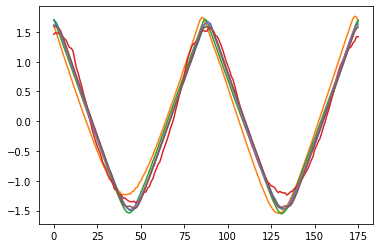

In [44]:
import matplotlib.pyplot as plt

#Plotting some of the time series to see what they look like
plt.figure()
for i in range(0,N_train-1, 70):
  plt.plot(x_train[i])
  

Loading training and test sets into PyTorch Dataset object and passing the dataset into Dataloader

In [45]:
def create_dataset(X, y, device):
  X_tensor = torch.tensor(X, dtype=torch.float32, device=device)

  #Some of the datasets has classes starting from 1, need them to start from 0
  if ( ((y_train==0).sum())==0 ): #If there is no class 0
    y_tensor = torch.tensor(y, dtype=torch.long, device=device)-1
  else:
    y_tensor = torch.tensor(y, dtype=torch.long, device=device)

  return TensorDataset(X_tensor, y_tensor)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Load training and test sets into PyTorch Dataset object
train_ds = create_dataset(x_train, y_train, device)
test_ds  = create_dataset(x_test, y_test, device)

bs= 64 #Batch size

#Pass dataset object into DataLoader
train_dl = DataLoader(train_ds, batch_size = bs, shuffle=False)
test_dl = DataLoader(test_ds, batch_size = bs, shuffle=False)



In [46]:
#Checking the sizes
print("Batch_size: ", bs)  

for x , y in train_dl:
  print("x_train shape on PyTorch: ", x.size())
  print("y_train shape on PyTorch: ", y.size())

for x, y in test_dl:
  print("x_test shape on PyTorch: ", x.size())
  print("y_test shape on PyTorch: ", y.size())

Batch_size:  64
x_train shape on PyTorch:  torch.Size([64, 176])
y_train shape on PyTorch:  torch.Size([64])
x_train shape on PyTorch:  torch.Size([64, 176])
y_train shape on PyTorch:  torch.Size([64])
x_train shape on PyTorch:  torch.Size([64, 176])
y_train shape on PyTorch:  torch.Size([64])
x_train shape on PyTorch:  torch.Size([64, 176])
y_train shape on PyTorch:  torch.Size([64])
x_train shape on PyTorch:  torch.Size([64, 176])
y_train shape on PyTorch:  torch.Size([64])
x_train shape on PyTorch:  torch.Size([64, 176])
y_train shape on PyTorch:  torch.Size([64])
x_train shape on PyTorch:  torch.Size([5, 176])
y_train shape on PyTorch:  torch.Size([5])
x_test shape on PyTorch:  torch.Size([64, 176])
y_test shape on PyTorch:  torch.Size([64])
x_test shape on PyTorch:  torch.Size([64, 176])
y_test shape on PyTorch:  torch.Size([64])
x_test shape on PyTorch:  torch.Size([64, 176])
y_test shape on PyTorch:  torch.Size([64])
x_test shape on PyTorch:  torch.Size([64, 176])
y_test shape o